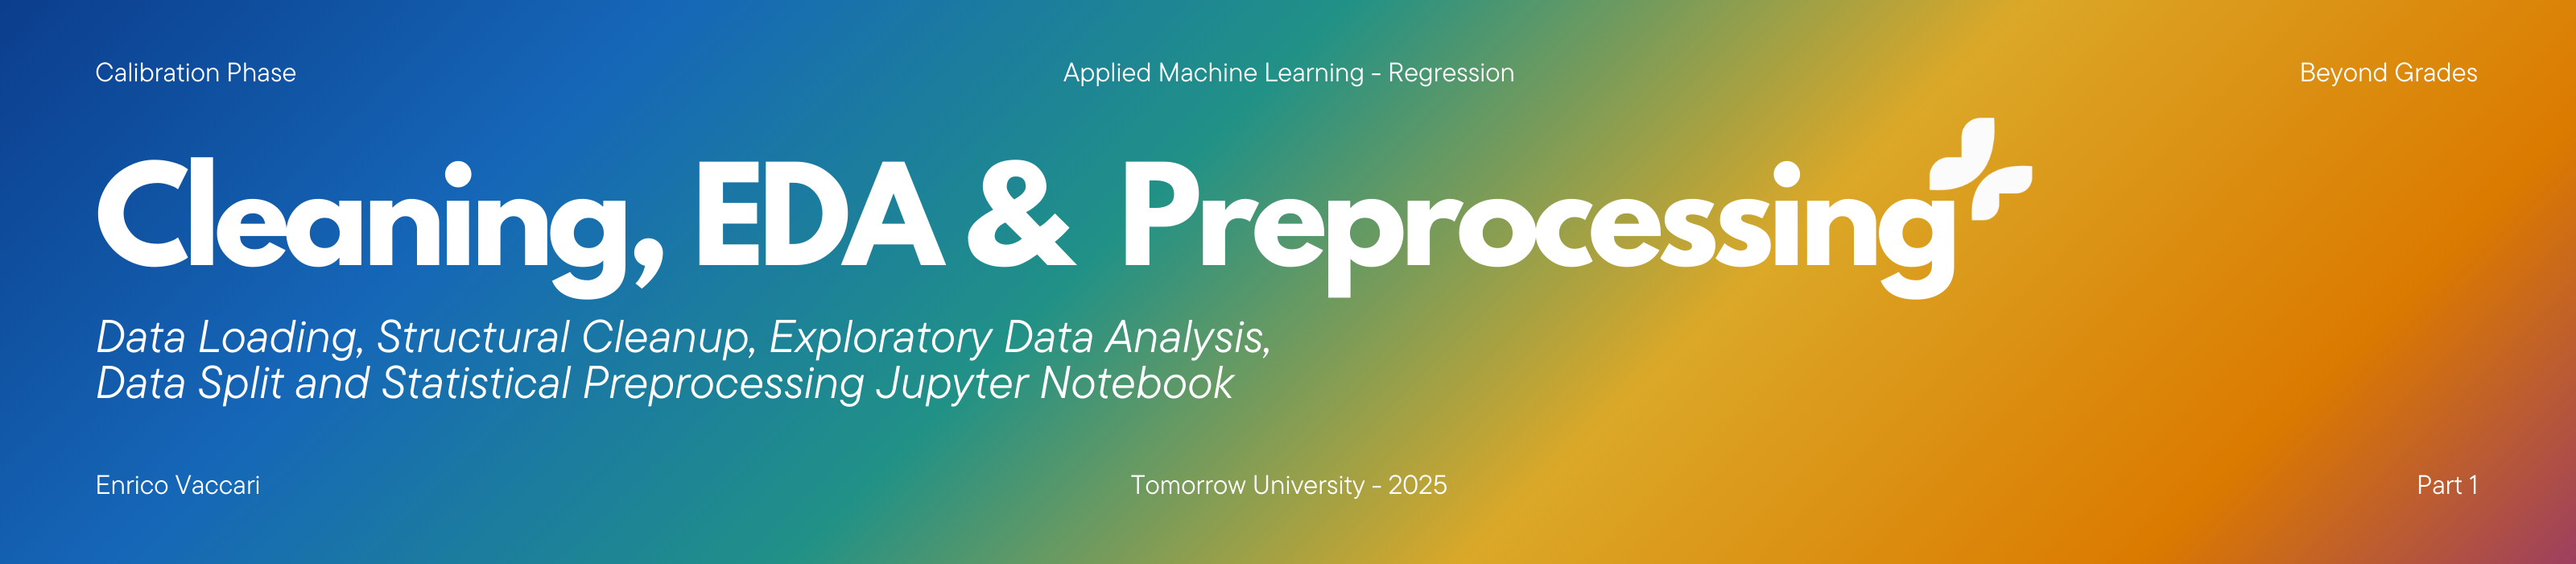

In [2]:
from IPython.display import Image, HTML, display
display(Image("../extra/images/Beyond_Grades_Banner_01.png", width=1600))

# 📚 <data.loading> Index

- [1 - Imports](#1---imports)  
  - [1.1 - Setup Project](#11---setup-project)  

- [2 - Dataset Load](#2---dataset-load)  
  - [2.1 - Loading](#21---loading)  

- [3 - Exploration](#3---exploration)  
  - [3.1 - Quick Exploration](#31---quick-exploration)  
  - [3.2 - Duplicates](#32---duplicates)  
  - [3.3 - Missing Values](#33---missing-values)  
  - [3.4 - Categorical Value Counts](#34---categorical-value-counts)  
  - [3.5 - Dataset Feature Summary](#35---dataset-feature-summary)  

---
# 1 - IMPORTS

### 1.1 - SETUP PROJECT

In Jupyter Notebook I can't use __file__ to get to the project dir, hence the usage of Path. As you can see, I have added the relative PROJECT_PATH (containing the import.py) to sys so I can import the module in the notebook.

In [3]:
# Centralized setup
import sys
from pathlib import Path

# Make sure PROJECT_PATH is in sys
PROJECT_ROOT = Path.cwd().resolve().parent
PROJECT_PATH = PROJECT_ROOT / "src" / "project"

if str(PROJECT_PATH) not in sys.path:
    sys.path.insert(0, str(PROJECT_PATH))

# Centralized import
from imports import *

cleaning.py functions module imported from: C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\ToU\Phases\02_Calibration_Phase\Applied_Machine_Learning\Regression\beyond-grades-ml-project\src\data
preprocessing.py functions module imported from: C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\ToU\Phases\02_Calibration_Phase\Applied_Machine_Learning\Regression\beyond-grades-ml-project\src\data
splitting.py functions module imported from: C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\ToU\Phases\02_Calibration_Phase\Applied_Machine_Learning\Regression\beyond-grades-ml-project\src\data
analysis.py functions module imported from: C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\ToU\Phases\02_Calibration_Phase\Applied_Machine_Learning\Regression\beyond-grades-ml-project\src\features
utils.py functions module imported from: C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\U

---
# 2 - DATASET LOAD

### 2.1 - LOADING

I used the function get.student_csv_path() (from the module utils) to get the path of the raw dataset. Then, I moved on to loading it through load_student_dataset()

In [4]:
# Get dataset path
dataset_path = utils.get_student_csv_path()
print(dataset_path)

# Load dataset
try:
    df = utils.load_student_dataset(dataset_path)
    print('Data loaded successfully.')
except Exception as e:
    print(f'An error occurred during data loading: {e}')

# Save copy of raw dataset as .xslx for visual exploration
utils.save_dataset(df, 'raw/student_performance_data_2025.xlsx')

C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\ToU\Phases\02_Calibration_Phase\Applied_Machine_Learning\Regression\beyond-grades-ml-project\data\raw\student_performance_data_2025.csv
Data loaded successfully.
✅ File saved at: C:\Users\Vaccari\Desktop\iCloudDrive\Desktop\ENRICO\05_LEARNING\University\ToU\Phases\02_Calibration_Phase\Applied_Machine_Learning\Regression\beyond-grades-ml-project\data\raw\student_performance_data_2025.xlsx


I quickly explored the main features of the dataset (head, info, shape). The print below shows that:

- there are 15 features ()
- 2392 entries in total
- 6 of them (including the target 'GPA') are numerical features: 'Age', StudyTimeWeekly, 'Absences', 'GPA', 'GradeClass'
- 8 of them are categorical features: categorical_cols = "Gender", "Ethnicity", "ParentalEducation", "Tutoring", "ParentalSupport", "Extracurricular", "Sports", "Music", "Volunteering"
- 1 is an identifier column: 'StudentID'

The table below summarizes the dataset features, their type and a short description.

| Feature Name       | Type                                | Description                                                                 |
|--------------------|-------------------------------------|-----------------------------------------------------------------------------|
| StudentID          | Identifier (int64) – *to drop*      | Unique identifier for each student (not useful for modeling).               |
| Age                | Numerical (int64, discrete)         | Age of the student (in years).                                              |
| Gender             | Categorical (binary, int64)         | Gender of the student (e.g., 0 = female, 1 = male).                         |
| Ethnicity          | Categorical (multi-class, int64)    | Student’s ethnicity group (coded numerically).                              |
| ParentalEducation  | Categorical (ordinal, int64)        | Highest education level achieved by parents.                                |
| StudyTimeWeekly    | Numerical (float64, continuous)     | Average weekly study time (hours).                                          |
| Absences           | Numerical (int64, discrete)         | Number of school absences.                                                  |
| Tutoring           | Categorical (binary, int64)         | Whether the student receives tutoring (0 = no, 1 = yes).                    |
| ParentalSupport    | Categorical (ordinal, int64)        | Level of parental support (coded as ordinal values).                        |
| Extracurricular    | Categorical (binary, int64)         | Participation in extracurricular activities (0 = no, 1 = yes).              |
| Sports             | Categorical (binary, int64)         | Participation in sports (0 = no, 1 = yes).                                  |
| Music              | Categorical (binary, int64)         | Participation in music-related activities (0 = no, 1 = yes).                |
| Volunteering       | Categorical (binary, int64)         | Engagement in volunteering (0 = no, 1 = yes).                               |
| GPA                | Numerical (float64, continuous)     | Grade Point Average (academic performance).                                 |
| GradeClass         | Numerical (float64, continuous)     | Final grade/class score (target variable).                                  |


---
# 3 - EXPLORATION

### 3.1 - QUICK EXPLORATION

In [21]:
# Look at the first few rows
print(df.head())

# Get basic info about each column
print(df.info())

# Basic statistics for numerical columns
print(df.describe())

# A quick peek at the data shape
print("Dataset Shape:", df.shape)  # (rows, columns)
print("Number of features:", len(df.columns))
print("Number of samples:", len(df))

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

The dataset had been previously partially cleaned so there should not be any duplicates but let's check that. 

### 3.2 - DUPLICATES

In [ ]:
# Check for exact duplicates across all columns
exact_duplicates = df.duplicated().sum()
print(f"Exact duplicates found: {exact_duplicates}")

# View duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]
print(f"Total rows involved in duplication: {len(duplicate_rows)}")

# Remove exact duplicates (keep first occurrence)
df_cleaned = df.drop_duplicates(keep='first')

# Document the cleaning decision
cleaning_log = {
    'original_rows': len(df),
    'exact_duplicates_removed': len(df) - len(df_cleaned),
    'final_rows': len(df_cleaned)
}
print(f"Cleaning summary: {cleaning_log}")

Exact duplicates found: 0
Total rows involved in duplication: 0
Cleaning summary: {'original_rows': 2392, 'exact_duplicates_removed': 0, 'final_rows': 2392}


As you can see, there are no duplicates withing the dataset. Let's see if there are any missing values in the columns. 

### 3.3 - MISSING VALUES

In [7]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In this dataset, it seems there are no missing values. If I had come across missing values in the data,
I would have considered using methods like fillna() or dropna(), based on my analytical needs and rationale.

Then, I also outputted the value counts for each categorical feature and this also helped me detect any potential formatting issue or inconsistencies. As you can see below, there is nothing that catches my attention and that I should take care of regarding ths aspect. 

### 3.4 - CATEGORICAL VALUE COUNTS

In [8]:
# Check for value counts for categorical features
print(df_cleaned['Age'].value_counts())
print(df_cleaned['Ethnicity'].value_counts())
print(df_cleaned['ParentalEducation'].value_counts())
print(df_cleaned['Tutoring'].value_counts())
print(df_cleaned['ParentalSupport'].value_counts())
print(df_cleaned['Extracurricular'].value_counts())
print(df_cleaned['Sports'].value_counts())
print(df_cleaned['Music'].value_counts())
print(df_cleaned['Volunteering'].value_counts())

Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64
Ethnicity
0    1207
1     493
2     470
3     222
Name: count, dtype: int64
ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64
Tutoring
0    1671
1     721
Name: count, dtype: int64
ParentalSupport
2    740
3    697
1    489
4    254
0    212
Name: count, dtype: int64
Extracurricular
0    1475
1     917
Name: count, dtype: int64
Sports
0    1666
1     726
Name: count, dtype: int64
Music
0    1921
1     471
Name: count, dtype: int64
Volunteering
0    2016
1     376
Name: count, dtype: int64


### 3.5 - DATASET FEATURE SUMMARY

In [19]:
summary = pd.DataFrame({
    'Feature Name': df_cleaned.columns,
    'Type': df_cleaned.dtypes,
    'Missing Values': df_cleaned.isnull().mean().round(2),
    'Unique Values': df.nunique()
})
summary

,Feature Name,Type,Missing Values,Unique Values
StudentID,StudentID,int64,0.0,2392
Age,Age,int64,0.0,4
Gender,Gender,int64,0.0,2
Ethnicity,Ethnicity,int64,0.0,4
ParentalEducation,ParentalEducation,int64,0.0,5
StudyTimeWeekly,StudyTimeWeekly,float64,0.0,2392
Absences,Absences,int64,0.0,30
Tutoring,Tutoring,int64,0.0,2
ParentalSupport,ParentalSupport,int64,0.0,5
Extracurricular,Extracurricular,int64,0.0,2


Below I have created a more in-depth summary table including notes on my understanding of the features and ethical considerations. 

| Feature Name       | Type                                | # Datapoints | Keep/Drop | Feature/Target | Missing Values | Unique Values                                                                 | Notes                                                                 | Assumptions / Ethical Considerations                                                                 |
|--------------------|-------------------------------------|--------------|-----------|----------------|----------------|-------------------------------------------------------------------------------|----------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|
| StudentID          | Identifier (int64)                  | 2392         | Drop      | –              | 0              | 2392 unique                                                                  | Dropped because it is just an identifier, not useful for modeling.   | –                                                                                                    |
| Age                | Numerical (int64, discrete)         | 2392         | Keep      | Feature        | 0              | {15: 630, 16: 593, 17: 587, 18: 582}                                         | Age in years, discrete.                                              | Data balanced across ages. Need to check if age correlates with study opportunities.                 |
| Gender             | Categorical (binary, int64)         | 2392         | Keep      | Feature        | 0              | 2 unique (0/1)                                                               | Binary encoded (e.g., 0 = female, 1 = male).                         | ⚠️ Potential bias: in Pakistan, females may face structural barriers (less study time, more chores). |
| Ethnicity          | Categorical (multi-class, int64)    | 2392         | Keep      | Feature        | 0              | {0: 1207, 1: 493, 2: 470, 3: 222}                                            | Encoded categorical, 4 groups.                                       | Important to check whether ethnicity influences GPA unfairly due to social inequality.               |
| ParentalEducation  | Categorical (ordinal, int64)        | 2392         | Keep      | Feature        | 0              | {2: 934, 1: 728, 3: 367, 0: 243, 4: 120}                                     | Ordinal scale (0–4).                                                 | Could encode socioeconomic status; may reflect inequalities in educational access.                   |
| StudyTimeWeekly    | Numerical (float64, continuous)     | 2392         | Keep      | Feature        | 0              | Continuous                                                                   | Weekly average hours of study.                                       | Some values are unrealistically small (seconds). Likely tracked by an app; may reflect app usage not true study. |
| Absences           | Numerical (int64, discrete)         | 2392         | Keep      | Feature        | 0              | Range of values (discrete count)                                             | Number of absences, integer.                                         | ⚠️ Females may have fewer allowed absences due to domestic responsibilities → potential bias.        |
| Tutoring           | Categorical (binary, int64)         | 2392         | Keep      | Feature        | 0              | {0: 1671, 1: 721}                                                            | Whether the student receives tutoring.                               | Access to tutoring might reflect wealth/status → risk of socioeconomic bias.                         |
| ParentalSupport    | Categorical (ordinal, int64)        | 2392         | Keep      | Feature        | 0              | {2: 740, 3: 697, 1: 489, 4: 254, 0: 212}                                     | Ordinal scale (0–4).                                                 | Possible subjectivity in reporting parental support → may not be consistent.                         |
| Extracurricular    | Categorical (binary, int64)         | 2392         | Keep      | Feature        | 0              | {0: 1475, 1: 917}                                                            | Participation in extracurricular activities.                         | Activities may not be equally accessible to all genders or income groups.                            |
| Sports             | Categorical (binary, int64)         | 2392         | Keep      | Feature        | 0              | {0: 1666, 1: 726}                                                            | Participation in sports.                                             | ⚠️ Likely male-dominated; access for females may be limited → could bias correlations with GPA.      |
| Music              | Categorical (binary, int64)         | 2392         | Keep      | Feature        | 0              | {0: 1921, 1: 471}                                                            | Participation in music-related activities.                           | Need to check gender split: if one gender has more access, correlations with GPA could be biased.    |
| Volunteering       | Categorical (binary, int64)         | 2392         | Keep      | Feature        | 0              | {0: 2016, 1: 376}                                                            | Volunteering activities.                                             | Access to volunteering may depend on social/gender roles.                                            |
| GPA                | Numerical (float64, continuous)     | 2392         | Keep      | Target         | 0              | Continuous (many decimals)                                                   | Chosen target variable (academic performance).                       | GPA is system-calculated, very granular. Biases in opportunities (gender, SES) may influence scores. |
| GradeClass         | Numerical (float64, continuous)     | 2392         | Drop      | –              | 0              | Continuous                                                                   | Dropped because GPA is already used as target; GradeClass is redundant classification. |  Directly derived from GPA.                                                                                                   |
